# Reading a DM3 File with ScopeReader

**Gerd Duscher**

10/09/2020

**This document is a simple example of how to read DM3 Files into the sidpy dataformat**

**UNDER CONSTRUCTION**

## Introduction

Digital Micrograph from Gatan runs on many TEMs for data acquisition.
We read and plot such files here.

## Import all necessary packages

There are a few setup procedures that need to be followed before any code is written. In this step, we simply load a
few python packages that will be necessary in the later steps.


In [2]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np

import sys
from sidpy.io.interface_utils import open_file_dialog
sys.path.insert(0,'../../')
from SciFiReaders import DM3Reader
import SciFiReaders
print('SciFiReaders version: ', SciFiReaders.__version__)
import sidpy
print('sidpy version: ', sidpy.__version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.


c:\Users\gduscher\Documents\Github\SciFiReaders\notebooks\01_using_readers\../..\SciFiReaders\readers\microscopy\spm\afm\AR_hdf5.py:250: SyntaxWarning: invalid escape sequence '\s'
  match = re.search(r"^" + name + ":\s+(.+$)", self.notes, re.M)


SciFiReaders version:  0.11.6
sidpy version:  0.12.3


## Open a file dialog

Here we select the name of the file to open. We will be using the sidpy interface to do that.

The ``openfile_dialog`` will open QT file dialog to select a file.

For examples go to the ``example_data`` directory in the original folder of this notebook.

Note.: in some operating systems the window will not show up on top, look in your task bar.

In [2]:
%gui qt5

: 

: 

In [3]:

file_list = open_file_dialog()

Select(description='Select file:', layout=Layout(width='70%'), options=('.',), rows=10, value='.')

In [13]:
FileList = open_file_dialog()

Select(description='Select file:', layout=Layout(width='70%'), options=('.',), rows=10, value='.')

In [4]:
file_list.file_name


'c:\\Users\\gduscher\\Documents\\2022-Experiment\\2022-08-18\\eels2.dm3'

###  Catch a bad selection or cancelling of file selection

In [5]:


if len(file_list.file_name) < 3 or file_list.file_name[-4:] != '.dm3':
    print('File not supported')

In [4]:
file_list.file_name

'c:\\Users\\gduscher\\Documents\\2023-Experiments\\09222023eels\\gr_LL_0.dm4'

## Read file
We use the ScopeReader to read the file into a sidpy dataset.
All metadata (absolutely everything) is saved in the ``original_metadata`` attribute
of the sidpy Dataset. If the selected file is not a dm3 File you get an ``IOError``.

In [6]:
dm3_reader = DM3Reader(file_list.file_name)
datasets = dm3_reader.read()
datasets


{'Channel_000': sidpy.Dataset of type SPECTRUM with:
  dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
  data contains: intensity (counts)
  and Dimensions: 
 energy_loss:  energy-loss (eV) of size (2048,)
  with metadata: ['experiment']}

In [7]:
dataset = datasets['Channel_000']
dataset

sidpy.Dataset of type SPECTRUM with:
 dask.array<array, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['experiment']

## Plot File
Only one command is necessary to plot the file.

In [8]:
FileWidget.file_name

NameError: name 'FileWidget' is not defined

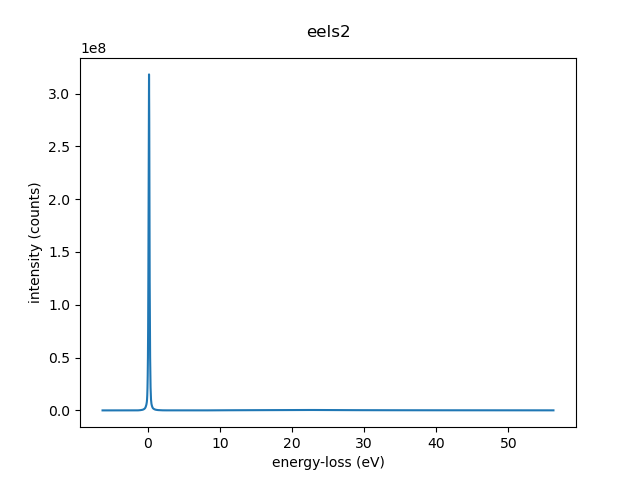

In [11]:
view = dataset.plot()

## DM3 Original Metadata
Digital micrograph stores a lot of metadata in the file and we read all of them and store that information in the ``original_metadata``. 

In [13]:
dataset.view_original_metadata()

ImageData :
	Calibrations :
		Brightness :
			Origin : 0.0
			Scale : 1.0
			Units : Counts
		Dimension :
			0 :
				Origin : -1400.0
				Scale : 0.25
				Units : eV
		DisplayCalibratedUnits : 1
	Data : read
	DataType : 2
	Dimensions :
		0 : 2048
	PixelDepth : 4
ImageTags :
	Acquisition :
		Device :
			Active Size (pixels) : [2048, 520]
			Camera Number : 0
			CCD :
				Pixel Size (um) : [14.0, 14.0]
			Configuration :
				Transpose :
					Diagonal Flip : 0
					Horizontal Flip : 0
					Vertical Flip : 0
			Name : QUEFINA 1
			Source : QUEFINA 1
		Frame :
			Area :
				Transform :
					Class Name : cm_acquisitiontransform_list
					Transform List :
						0 :
							Binning : [1, 130]
							Class Name : cm_acquisitiontransform
							Sub Area Adjust : [0, 0, 0, 0]
							Transpose :
								Diagonal Flip : 0
								Horizontal Flip : 0
								Vertical Flip : 0
			CCD :
				Pixel Size (um) : [1820.0, 14.0]
			Intensity :
				Transform :
					Class Name : cm_valuetransform_list
					Tra